# Transformers, what can they do?

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [1]:
!pip install datasets evaluate transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 643.1 kB/s eta 0:00:00


In [7]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("fuck you")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9923542737960815}]

In [8]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [12]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "free lunch from prabs",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


{'sequence': 'free lunch from prabs',
 'labels': ['politics', 'business', 'education'],
 'scores': [0.4492988586425781, 0.32710590958595276, 0.2235952764749527]}

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

[{'generated_text': 'In this course, we will teach you how to understand and use '
                    'data flow and data interchange when handling user data. We '
                    'will be working with one or more of the most commonly used '
                    'data flows — data flows of various types, as seen by the '
                    'HTTP'}]

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

[{'generated_text': 'In this course, we will teach you how to manipulate the world and '
                    'move your mental and physical capabilities to your advantage.'},
 {'generated_text': 'In this course, we will teach you how to become an expert and '
                    'practice realtime, and with a hands on experience on both real '
                    'time and real'}]

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'sequence': 'This course will teach you all about mathematical models.',
  'score': 0.19619831442832947,
  'token': 30412,
  'token_str': ' mathematical'},
 {'sequence': 'This course will teach you all about computational models.',
  'score': 0.04052725434303284,
  'token': 38163,
  'token_str': ' computational'}]

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

[{'entity_group': 'PER', 'score': 0.99816, 'word': 'Sylvain', 'start': 11, 'end': 18}, 
 {'entity_group': 'ORG', 'score': 0.97960, 'word': 'Hugging Face', 'start': 33, 'end': 45}, 
 {'entity_group': 'LOC', 'score': 0.99321, 'word': 'Brooklyn', 'start': 49, 'end': 57}
]

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

{'score': 0.6385916471481323, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

[{'summary_text': ' America has changed dramatically during recent years . The '
                  'number of engineering graduates in the U.S. has declined in '
                  'traditional engineering disciplines such as mechanical, civil '
                  ', electrical, chemical, and aeronautical engineering . Rapidly '
                  'developing economies such as China and India, as well as other '
                  'industrial countries in Europe and Asia, continue to encourage '
                  'and advance engineering .'}]

In [14]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-id-en")
translator("makan siang gratis dari pemerintah")

Device set to use cpu


[{'translation_text': 'Free lunch from the government.'}]

In [16]:
from transformers import pipeline

image_classifier = pipeline(
    task="image-classification", model="google/vit-base-patch16-224"
)
result = image_classifier(
    "/content/sad 1.jpeg"
)
print(result)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


[{'label': 'Saluki, gazelle hound', 'score': 0.13162098824977875}, {'label': 'Labrador retriever', 'score': 0.13100498914718628}, {'label': 'Irish wolfhound', 'score': 0.11756231635808945}, {'label': 'borzoi, Russian wolfhound', 'score': 0.09114798158407211}, {'label': 'golden retriever', 'score': 0.08308392018079758}]


In [17]:
from transformers import pipeline

transcriber = pipeline(
    task="automatic-speech-recognition", model="openai/whisper-large-v3"
)
result = transcriber(
    "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"
)
print(result)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

Device set to use cpu
`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}


In [18]:
from transformers import pipeline
from PIL import Image

# Buka gambar
image = Image.open("/content/sad 1.jpeg")

# Buat pipeline untuk image captioning
captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

# Hasil caption
result = captioner(image)
print(result[0]['generated_text'])

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/modeling_auto.py:2160: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu
`cache.key_cache[idx]` is deprecated and will be removed in v4.56.0. Use `cache.layers[idx].keys` instead.
`cache.value_cache[idx]` is deprecated and will be removed in v4.56.0. Use `cache.layers[idx].values` instead.


a man sitting on a couch with his head in his hands


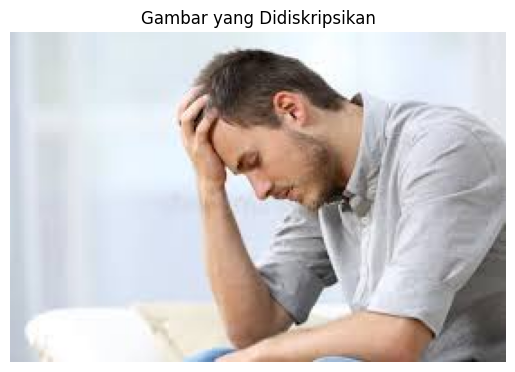

Device set to use cpu
Device set to use cpu


📷 Caption (EN): a man sitting on a couch with his head in his hands
📜 Caption (ID): seorang pria duduk di sofa dengan kepala di tangannya


In [23]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

# 1. Buka gambar dari file lokal
image_path = "/content/sad 1.jpeg"
image = Image.open(image_path)

# 2. Tampilkan gambar
plt.imshow(image)
plt.axis('off')
plt.title("Gambar yang Didiskripsikan")
plt.show()

# 3. Caption dalam bahasa Inggris
captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
caption_en = captioner(image)[0]['generated_text']

# 4. Terjemahkan ke Bahasa Indonesia
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-id")
caption_id = translator(caption_en)[0]['translation_text']

# 5. Tampilkan hasil
print("📷 Caption (EN):", caption_en)
print("📜 Caption (ID):", caption_id)

Saving kucing 1.jpeg to kucing 1.jpeg


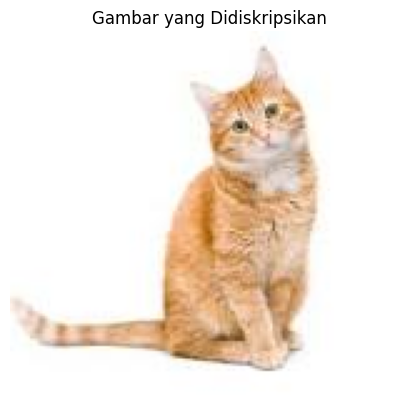

Device set to use cpu
Device set to use cpu


📷 Caption (EN): a cat sitting on the floor looking up
📜 Caption (ID): a cat sitting on the floor looking up


In [26]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
import io

# 1. Upload gambar secara interaktif
from google.colab import files  # gunakan ini di Google Colab
uploaded = files.upload()

# 2. Ambil gambar dari upload
for file_name in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[file_name]))
    break  # hanya ambil satu gambar

# 3. Tampilkan gambar
plt.imshow(image)
plt.axis('off')
plt.title("Gambar yang Didiskripsikan")
plt.show()

# 4. Buat pipeline captioning
captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
caption_en = captioner(image)[0]['generated_text']

# 5. Terjemahkan ke Bahasa Indonesia
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-id")
caption_id = translator(caption_en)[0]['translation_text']

# 6. Tampilkan hasil caption
print("📷 Caption (EN):", caption_en)
print("📜 Caption (ID):", caption_id)